In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("housing.csv")

In [45]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
data.dropna(inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [52]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

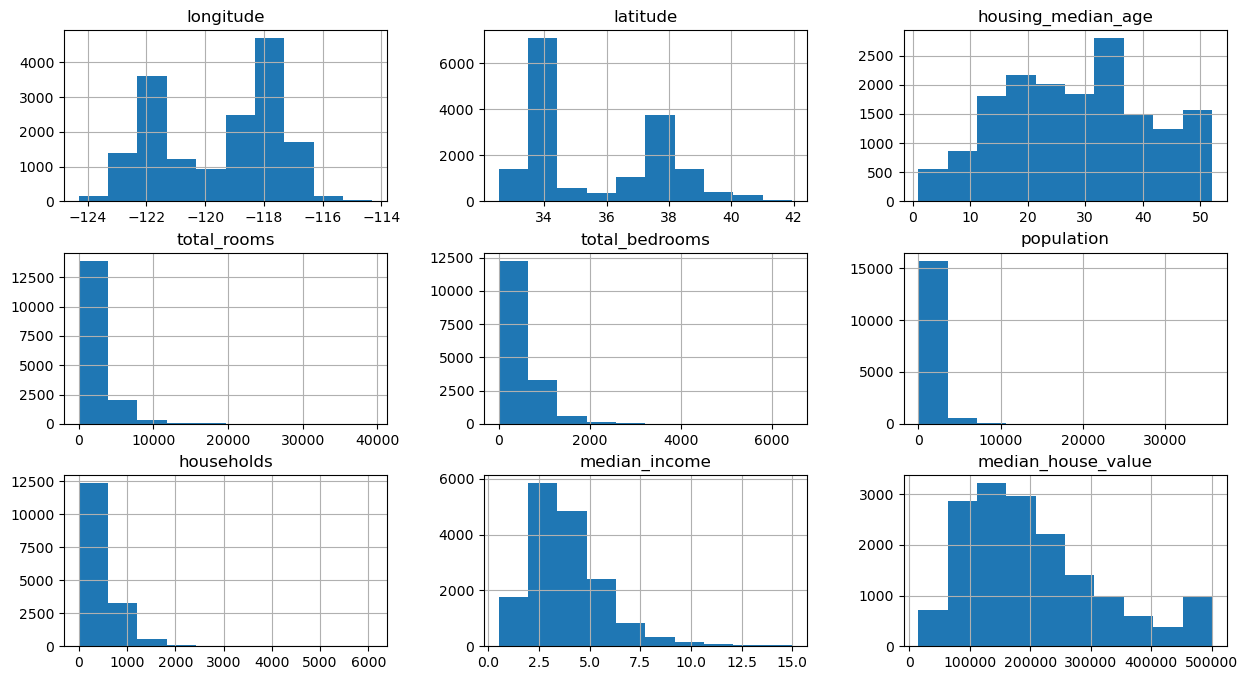

In [53]:
train_data.hist(figsize=(15,8))

In [54]:
train_data.corr()

/var/folders/jr/rkstjv754vv0qc7w_n4l5qrc0000gn/T/ipykernel_27189/1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924500,-0.107456,0.044108,0.068744,0.097600,0.055810,-0.019348,-0.046068
latitude,-0.924500,1.000000,0.008438,-0.034963,-0.065265,-0.106070,-0.070627,-0.076814,-0.144999
housing_median_age,-0.107456,0.008438,1.000000,-0.353587,-0.314913,-0.289157,-0.296860,-0.112652,0.111584
total_rooms,0.044108,-0.034963,-0.353587,1.000000,0.929245,0.855927,0.918211,0.192042,0.129007
total_bedrooms,0.068744,-0.065265,-0.314913,0.929245,1.000000,0.875012,0.979281,-0.015228,0.043846
population,0.097600,-0.106070,-0.289157,0.855927,0.875012,1.000000,0.905771,0.000479,-0.029252
households,0.055810,-0.070627,-0.296860,0.918211,0.979281,0.905771,1.000000,0.006972,0.059936
median_income,-0.019348,-0.076814,-0.112652,0.192042,-0.015228,0.000479,0.006972,1.000000,0.689959
median_house_value,-0.046068,-0.144999,0.111584,0.129007,0.043846,-0.029252,0.059936,0.689959,1.000000


/var/folders/jr/rkstjv754vv0qc7w_n4l5qrc0000gn/T/ipykernel_27189/3346828142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

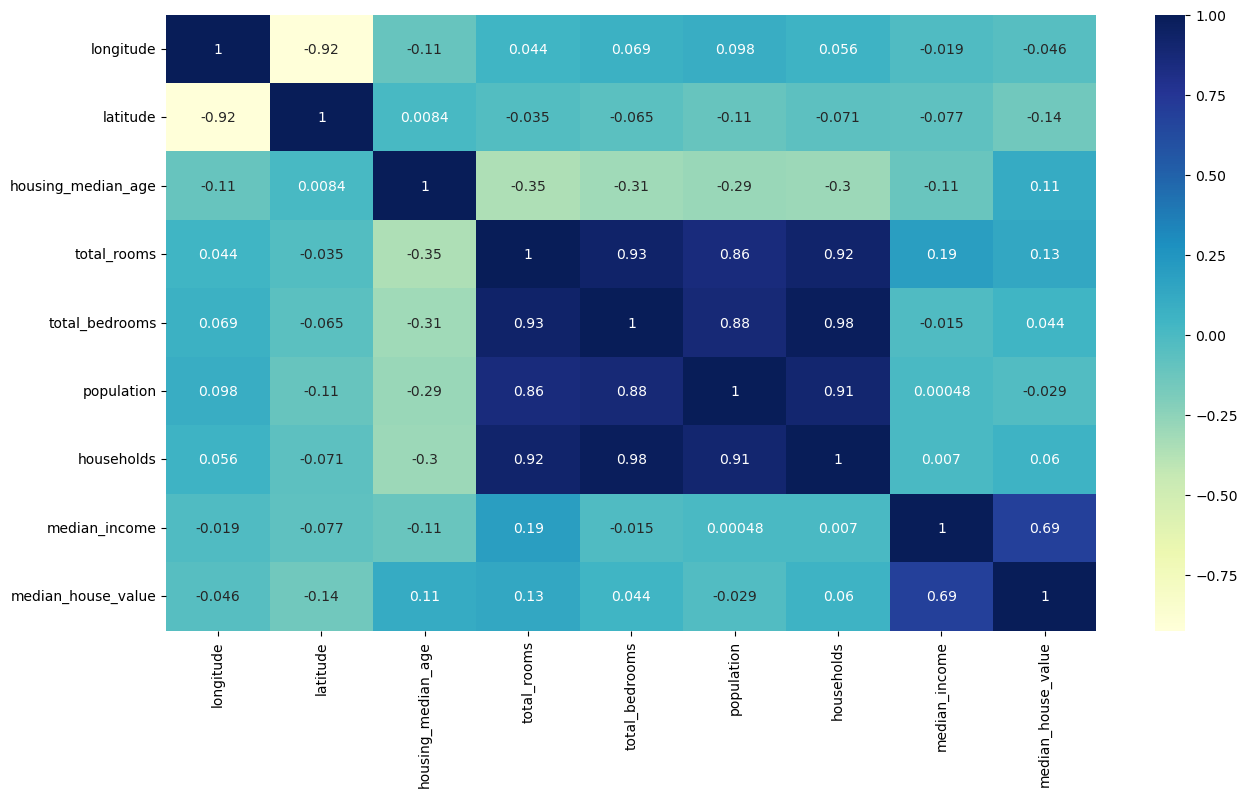

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

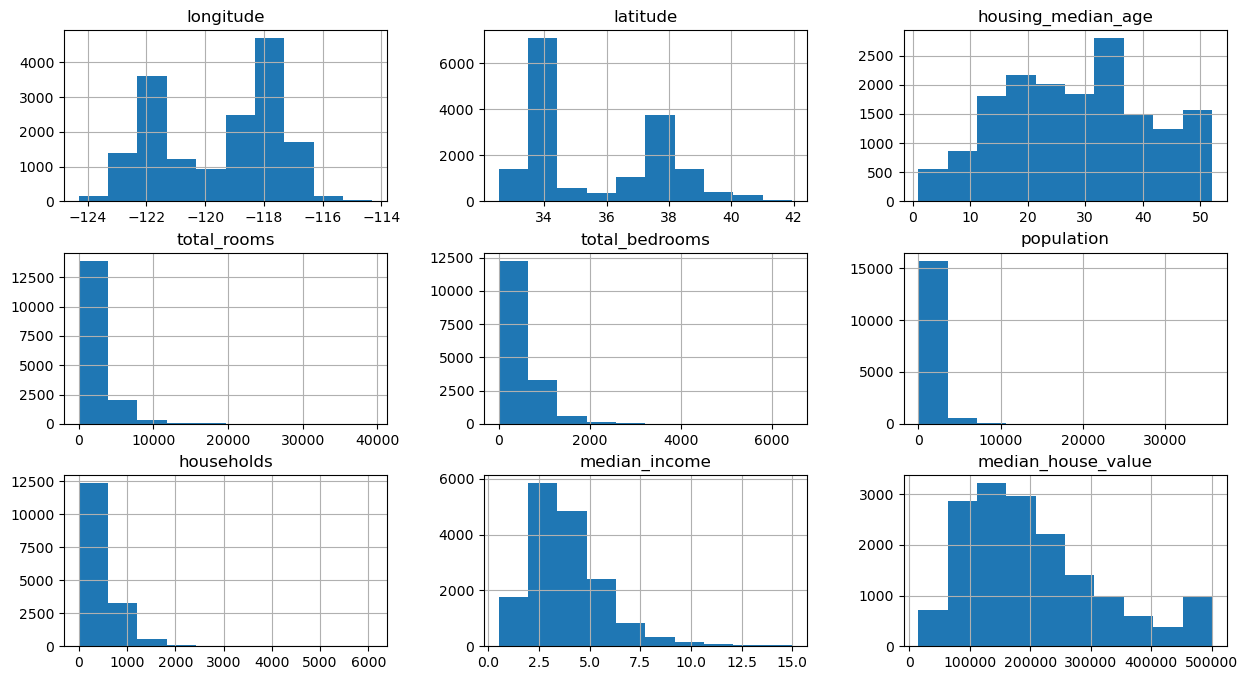

In [56]:
train_data.hist(figsize=(15,8))

In [57]:
#logarithm and +1 to prevent 0 value
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1) 
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

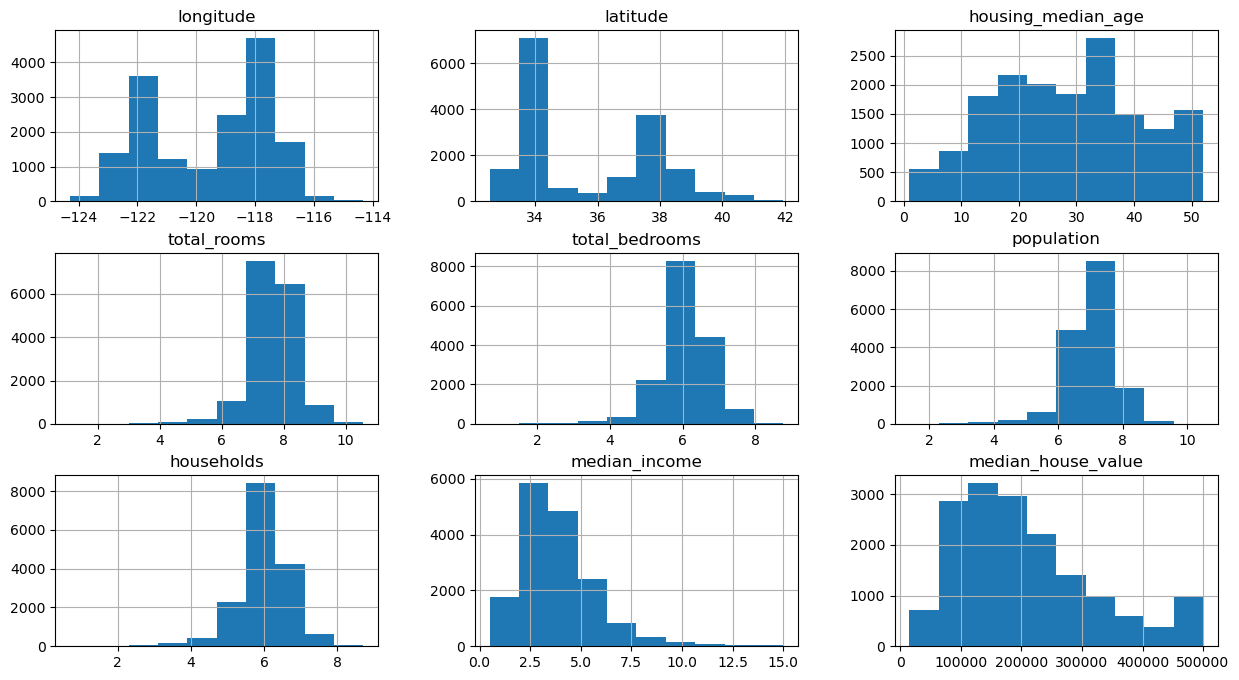

In [58]:
train_data.hist(figsize=(15,8))

In [59]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7218
INLAND        5197
NEAR OCEAN    2104
NEAR BAY      1823
ISLAND           4
Name: ocean_proximity, dtype: int64

In [60]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [61]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8872,-118.41,34.06,43.0,8.516193,6.964136,7.512618,6.877296,5.5321,500001.0,1,0,0,0,0
13376,-117.59,34.16,10.0,9.155673,7.074963,8.248006,7.023759,7.8252,361400.0,0,1,0,0,0
14705,-117.06,32.81,17.0,8.278936,6.311735,7.435438,6.317165,6.7927,234700.0,1,0,0,0,0
15565,-117.05,33.13,22.0,7.794823,5.968708,7.003065,5.894403,5.2323,167500.0,1,0,0,0,0
19533,-120.91,37.66,36.0,7.186144,5.545177,6.580639,5.451038,2.6523,76300.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,-124.11,40.93,17.0,7.415777,5.799093,6.855409,5.880533,2.7639,90200.0,0,0,0,0,1
19290,-122.84,38.42,29.0,7.921898,6.313548,7.231287,6.276643,2.9625,237300.0,1,0,0,0,0
20549,-121.80,38.69,8.0,8.173293,6.539586,7.658700,6.520621,3.7477,122200.0,0,1,0,0,0
5111,-118.31,33.96,48.0,7.608871,5.877736,6.928538,5.826000,4.0625,138700.0,1,0,0,0,0


<Axes: >

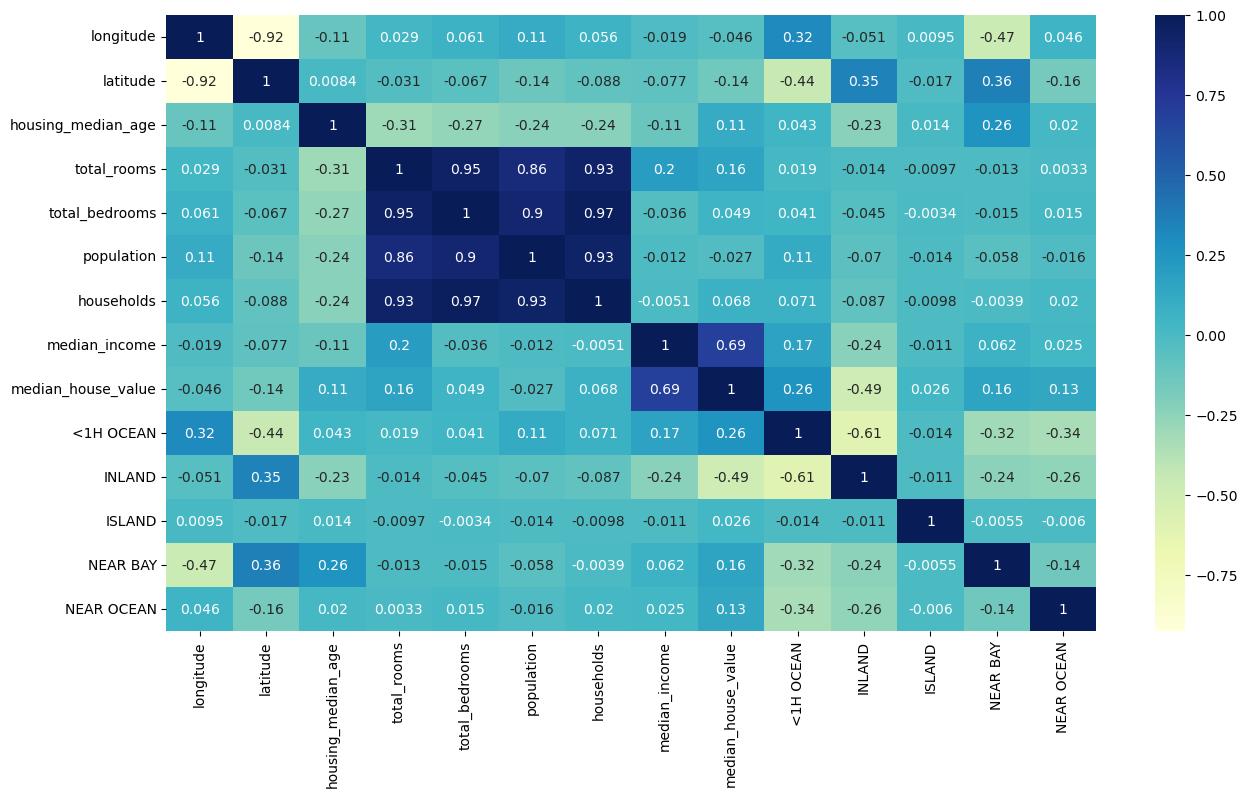

In [62]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

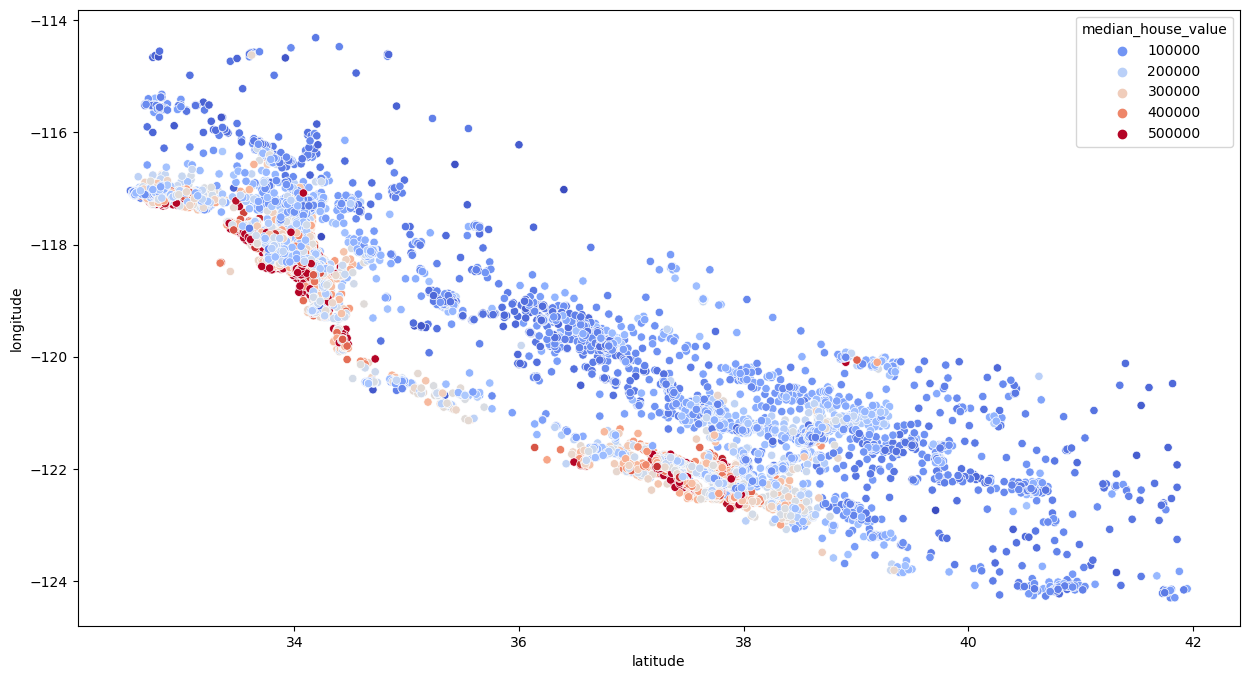

In [63]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [64]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

In [65]:
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

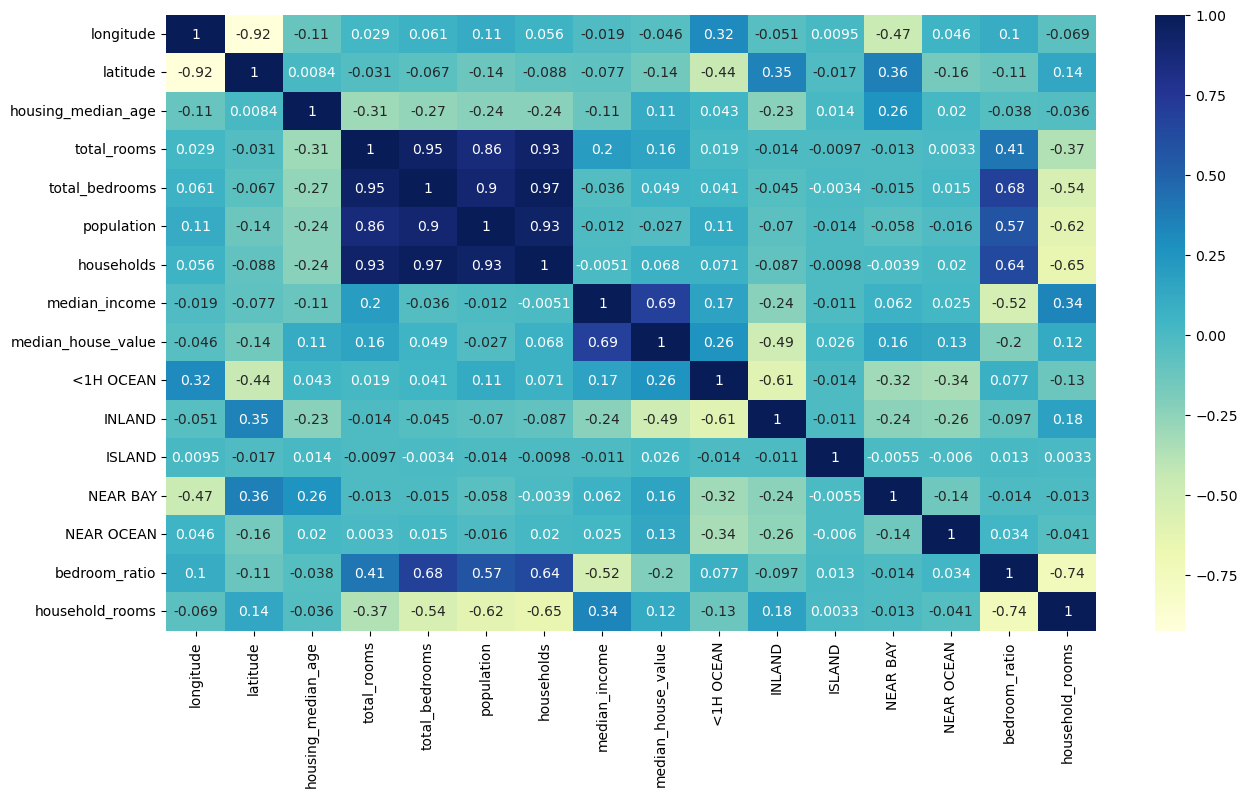

In [66]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train_s, y_train)


LinearRegression()

In [68]:
test_data = x_test.join(y_test)

#logarithm and +1 to prevent 0 value
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1) 
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [69]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [72]:
reg.score(x_test,y_test)

0.6490993515546413

In [85]:
x_test_s = scaler.transform(x_test)

In [86]:
reg.score(x_test_s,y_test)

0.6490787526048849

In [89]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [90]:
forest.score(x_test_s,y_test)

0.8141011716630521

In [95]:
#cross validation

from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True
)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=200)

In [97]:
grid_search.best_estimator_.score(x_test_s,y_test)

0.8145499077606755